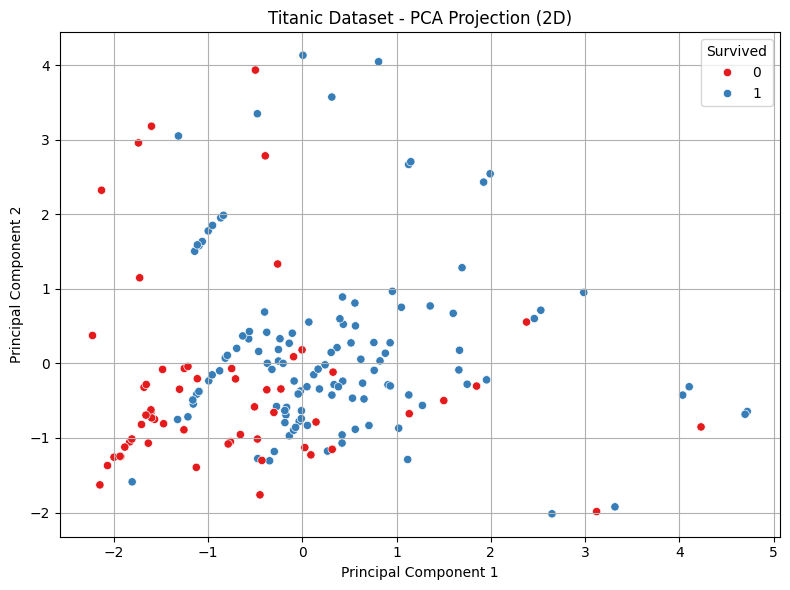

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Drop rows with missing values for simplicity
df_clean = df.dropna()

# Select numeric features only
numeric_features = df_clean.select_dtypes(include=['int64', 'float64'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_features)

# Optional PCA: Reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Survived'] = df_clean['survived'].values

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Survived', palette='Set1')
plt.title('Titanic Dataset - PCA Projection (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Survived')
plt.grid(True)
plt.tight_layout()
plt.show()






In [2]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# 1. Load Titanic dataset
df = sns.load_dataset('titanic')

# 2. Select relevant features for clustering
features = ['age', 'fare', 'pclass', 'sex']

# 3. Drop rows with missing values in selected features
df_clean = df[features].dropna()

# 4. Encode categorical variables
df_clean['sex'] = df_clean['sex'].map({'male': 0, 'female': 1})

# 5. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# 6. Fit K-Means model and assign clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(X_scaled)

# Show first few rows with cluster labels
print(df_clean.head())



    age     fare  pclass  sex  cluster
0  22.0   7.2500       3    0        1
1  38.0  71.2833       1    1        0
2  26.0   7.9250       3    1        2
3  35.0  53.1000       1    1        0
4  35.0   8.0500       3    0        1


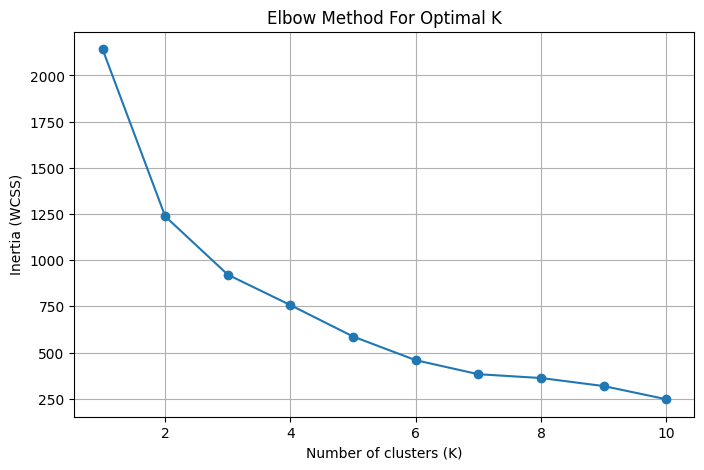

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Select numeric and relevant features only
features = df[['age', 'fare', 'pclass']].copy()

# Handle missing values (drop or fill)
features.dropna(inplace=True)

# Scaling features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.show()



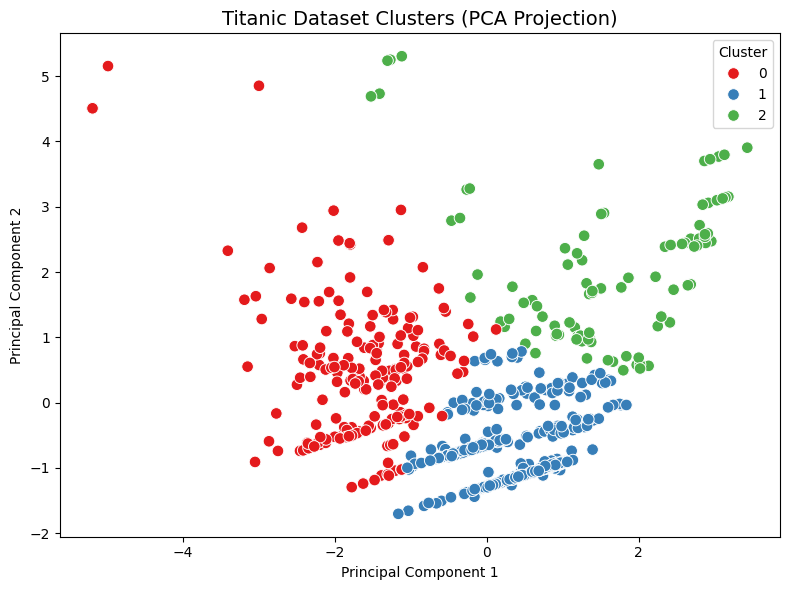

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Select numeric features and drop rows with missing values
features = ['age', 'fare', 'pclass', 'sibsp', 'parch']
titanic_clean = titanic[features].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(titanic_clean)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

# Reduce dimensions with PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame for plotting
plot_df = pd.DataFrame(data=pca_components, columns=["PC1", "PC2"])
plot_df["Cluster"] = clusters

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_df, x="PC1", y="PC2", hue="Cluster", palette="Set1", s=70)
plt.title("Titanic Dataset Clusters (PCA Projection)", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load Titanic dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Drop non-informative columns
df = df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Encode categorical features
categorical_cols = df_imputed.select_dtypes(include='object').columns
encoder = LabelEncoder()
for col in categorical_cols:
    df_imputed[col] = encoder.fit_transform(df_imputed[col])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Evaluate using Silhouette Score
sil_score = silhouette_score(X_scaled, labels)

print(f"Silhouette Score for KMeans (k=3): {sil_score:.4f}")




Silhouette Score for KMeans (k=3): 0.2916
